In [1]:
#definindo imports
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score

from scipy.sparse import coo_matrix
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

In [2]:
# To plot pretty figures
%matplotlib inline
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
#CRIAÇÃO DAS BASES DE DADOS

# teste 1 - tudo default
X, y = make_classification(random_state = 42)
linearly_separable_teste_1 = (X, y)

# teste 2 - copia do https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state = 42, n_clusters_per_class=1)
rng = np.random.RandomState(42)
X += 2 * rng.uniform(size=X.shape)
linearly_separable_teste_2 = (X, y)

# teste 3 - aumentando número de amostras
X, y = make_classification(n_samples = 5000, random_state = 42)
linearly_separable_teste_3 = (X, y)

# teste 4 - aumentando número de amostras e features
X, y = make_classification(n_samples = 5000, n_features = 30, random_state = 42)
linearly_separable_teste_4 = (X, y)

# teste 5 - aumentando número de amostras e features, mas diminuindo o class_sep
X, y = make_classification(n_samples = 5000, n_features = 30, class_sep = 0.8, random_state = 42)
linearly_separable_teste_5 = (X, y)

datasets = [
    linearly_separable_teste_1,
    linearly_separable_teste_2,
    linearly_separable_teste_3,
    linearly_separable_teste_4,
    linearly_separable_teste_5
]

In [14]:
def plot(x,y):
    plt.plot(x, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0, 5.5, 0, 1.1])
    save_fig("generated_data_plot")
    plt.show()

Saving figure generated_data_plot


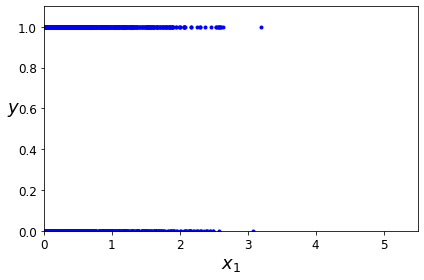

Saving figure generated_data_plot


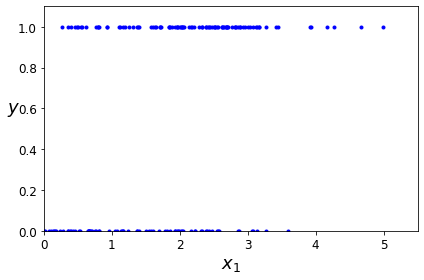

Saving figure generated_data_plot


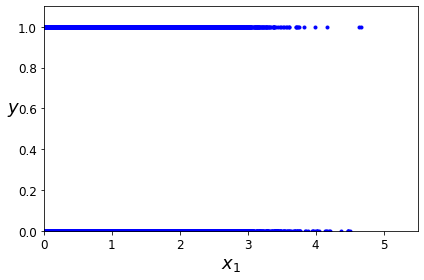

Saving figure generated_data_plot


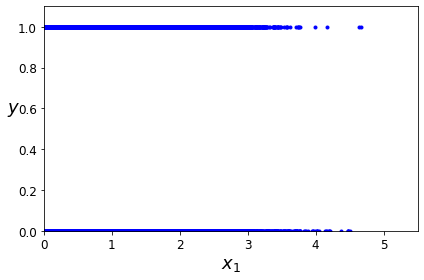

Saving figure generated_data_plot


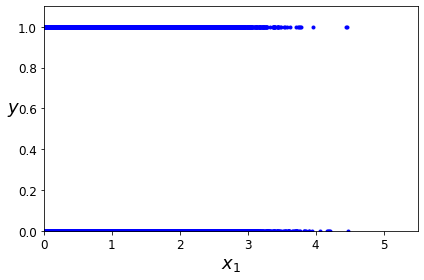

In [15]:
plot(linearly_separable_teste_1[0], linearly_separable_teste_1[1])
plot(linearly_separable_teste_2[0], linearly_separable_teste_2[1])
plot(linearly_separable_teste_3[0], linearly_separable_teste_3[1])
plot(linearly_separable_teste_4[0], linearly_separable_teste_4[1])
plot(linearly_separable_teste_5[0], linearly_separable_teste_5[1])

In [16]:
#CRIAÇÃO DOS CLASSIFICADORES

from sklearn.linear_model import SGDClassifier

names = [
    "SGD_HINGE_0.01",
    "SGD_LOG_0.01",
    "SGD_MODHUBER_0.01",
    "SGD_SQRDHINGE_0.01",
    "SGD_PERCEPTRON_0.01",
    
    "SGD_HINGE_0.1",
    "SGD_LOG_0.1",
    "SGD_MODHUBER_0.1",
    "SGD_SQRDHINGE_0.1",
    "SGD_PERCEPTRON_0.1",
    
    "SGD_HINGE_0.05",
    "SGD_LOG_0.05",
    "SGD_MODHUBER_0.05",
    "SGD_SQRDHINGE_0.05",
    "SGD_PERCEPTRON_0.05",
]

# ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’,
classifiers = [
    SGDClassifier(learning_rate = 'constant', eta0 = 0.01, random_state = 42, n_jobs = -1, loss = 'hinge'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.01, random_state = 42, n_jobs = -1, loss = 'log'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.01, random_state = 42, n_jobs = -1, loss = 'modified_huber'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.01, random_state = 42, n_jobs = -1, loss = 'squared_hinge'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.01, random_state = 42, n_jobs = -1, loss = 'perceptron'),
    
    SGDClassifier(learning_rate = 'constant', eta0 = 0.1, random_state = 42, n_jobs = -1, loss = 'hinge'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.1, random_state = 42, n_jobs = -1, loss = 'log'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.1, random_state = 42, n_jobs = -1, loss = 'modified_huber'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.1, random_state = 42, n_jobs = -1, loss = 'squared_hinge'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.1, random_state = 42, n_jobs = -1, loss = 'perceptron'),
    
    SGDClassifier(learning_rate = 'constant', eta0 = 0.05, random_state = 42, n_jobs = -1, loss = 'hinge'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.05, random_state = 42, n_jobs = -1, loss = 'log'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.05, random_state = 42, n_jobs = -1, loss = 'modified_huber'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.05, random_state = 42, n_jobs = -1, loss = 'squared_hinge'),
    SGDClassifier(learning_rate = 'constant', eta0 = 0.05, random_state = 42, n_jobs = -1, loss = 'perceptron'),
]

In [17]:
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        print("Teste: {}\nClassificador: {}\nScore: {}\n".format(ds_cnt+1, name, score))

Teste: 1
Classificador: SGD_HINGE_0.01
Score: 0.95

Teste: 1
Classificador: SGD_LOG_0.01
Score: 0.9

Teste: 1
Classificador: SGD_MODHUBER_0.01
Score: 0.95

Teste: 1
Classificador: SGD_SQRDHINGE_0.01
Score: 0.95

Teste: 1
Classificador: SGD_PERCEPTRON_0.01
Score: 0.85

Teste: 1
Classificador: SGD_HINGE_0.1
Score: 0.925

Teste: 1
Classificador: SGD_LOG_0.1
Score: 0.95

Teste: 1
Classificador: SGD_MODHUBER_0.1
Score: 0.9

Teste: 1
Classificador: SGD_SQRDHINGE_0.1
Score: 0.9

Teste: 1
Classificador: SGD_PERCEPTRON_0.1
Score: 0.85

Teste: 1
Classificador: SGD_HINGE_0.05
Score: 0.925

Teste: 1
Classificador: SGD_LOG_0.05
Score: 0.95

Teste: 1
Classificador: SGD_MODHUBER_0.05
Score: 0.875

Teste: 1
Classificador: SGD_SQRDHINGE_0.05
Score: 0.875

Teste: 1
Classificador: SGD_PERCEPTRON_0.05
Score: 0.85

Teste: 2
Classificador: SGD_HINGE_0.01
Score: 0.8

Teste: 2
Classificador: SGD_LOG_0.01
Score: 0.875

Teste: 2
Classificador: SGD_MODHUBER_0.01
Score: 0.85

Teste: 2
Classificador: SGD_SQRDHINGE